
# Data Wrangling and EDA of Car Dataset




## Table of Contents 

1. [Introduction](#intro)
2. [Data Wrangling](#wrangling)
3. [EDA](#eda)



## Introduction <a name='intro'>
    
In this notebook, we are going to take a look at the DVM-car dataset. The data is fairly well curated but there are a few tasks to be completed for this project. 
    
* Because the object detector is intended to be used locally, first, cars not sold in the American market or extremely rare will be removed from the data set.
* Any models that do not have sufficient data will be removed and possibly added back in the future when more data can be collected
* The data will then be shuffled and split into a training set
* Finally, the data will be converted to a tfrecord format.
    
The next notebook will explore the A2D2 data set of dashcamera frames.


## Data Wrangling <a name='wrangling'>

In [10]:
# Importing the os library
import os
 
# The path for listing items
path = 'Car_Images/resized_DVM_v2/resized_DVM'
 
# The list of items
files = os.listdir(path)
 
# create a list of all car makers
all_car_makers = []
for filename in files:
    all_car_makers.append(filename)
    

**To reduce the number of classes, cars not sold in the US or cars that are very rare will be removed.**

In [11]:
#list of cars that are not sold in the US or are very rare
rare_cars = ['Dacia', 'MG', 'SKODA', 'Koenigsegg', 'DAX', 'Ginetta', 'Great Wall', 'Jensen', 'Ferrari', 'Lamborghini', 'London Taxis International', 'Lotus', 'Maserati', 'Maybach', 'McLaren', 'MEV', 'Morgan', 'Radical', 'Renault', 'Reva', 'Rolls-Royce', 'SEAT', 'Ssangyong', 'Tiger', 'Vauxhall']

In [12]:
#list of all car brands to be used in this dataset
common_car_brands = list(set(all_car_makers) - set(rare_cars))

In [13]:
print(common_car_brands)

['Dodge', 'Lexus', 'DS', 'Hyundai', 'Kia', 'Tesla', 'Corvette', 'Toyota', 'Daihatsu', 'Volkswagen', 'Lincoln', 'Fiat', 'Daimler', 'Daewoo', 'Mazda', 'Suzuki', 'Infiniti', 'Proton', 'Isuzu', 'Jaguar', 'Saab', 'Hummer', 'GMC', 'Nissan', 'Jeep', 'Sebring', 'Ford', 'Smart', 'Honda', 'Subaru', 'Mitsubishi', 'Mercedes-Benz', 'Land Rover', 'TVR', 'MINI', 'Rover']


In [14]:
#make a list of all file names
image_files = []
for brand in common_car_brands:
    test = [x[-1] for x in os.walk(path + "/" + brand)]
    for jpg_list in test:
        if len(jpg_list) > 0:
            for jpeg in jpg_list:
                image_files.append(jpeg)




In [15]:
#size of the current dataset
len(image_files)

715779

In [16]:
def make_model_from_file_name(car_file):
    """Creates a label from the car file path"""
    name_list = car_file.split('$$')
    return(name_list[0] + "_" + name_list[1])

In [17]:
#make a list of image labels
image_labels = []
for filename in image_files:
    image_labels.append(make_model_from_file_name(filename))

In [18]:
#check to see if all the labels were collected
len(image_labels)

715779

In [19]:
#check how many classes there are
print(len(set(image_labels)))

456


In [50]:
def get_image_file_path(car_file_name):
    """Returns the complete filepath of a data file"""
    path = 'Car_Images/resized_DVM_v2/resized_DVM'
    parts = car_file_name.split('$$')
    return(path + '/' + parts[0] + '/' + parts[1] + '/' + parts[2] + '/' + parts[3] + '/' + car_file_name)


# EDA <a name='eda'>

Text(0.5, 1.0, 'Lexus_CT 200h')

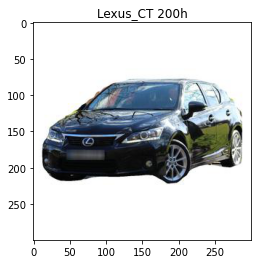

In [21]:
car_index = 1000
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
im = Image.open(get_image_file_path(image_files[car_index]))

import numpy as np

image = np.array(im, dtype='uint8')

plt.imshow(image)
plt.title(image_labels[car_index])


**As we can see, the image is 300x300 and has a white background. All of the images are formatted this way**

In [22]:
image.shape

(300, 300, 3)

In [23]:
cars_df = pd.DataFrame(pd.Series(image_labels).value_counts())

In [24]:
cars_df.reset_index(inplace=True)

In [25]:
cars_df.rename(columns={'index': 'make_model', 0:'count'}, inplace=True)

In [26]:
cars_df.head()

,make_model,count
0,Ford_Focus,27983
1,Ford_Fiesta,26004
2,Volkswagen_Golf,18178
3,Ford_Mondeo,18123
4,Fiat_500,15331


In [27]:
print(cars_df[cars_df['count'] < 5])

                  make_model  count
427           Suzuki_Kizashi      4
428             Lexus_GS 430      4
429           Toyota_Granvia      4
430        Mercedes-Benz_AMG      4
431             Toyota_HiAce      4
432        Mercedes-Benz_320      4
433            Mazda_Premacy      4
434        Daihatsu_Fourtrak      4
435     Nissan_eNV200 Evalia      3
436                Hummer_H3      3
437        Mercedes-Benz_230      3
438          Infiniti_Vettel      3
439          Toyota_4-Runner      2
440         Lincoln_Town Car      2
441             Honda_Legend      2
442             Toyota_Camry      2
443               Sebring_SX      2
444                Mazda_MPV      2
445  Land Rover_Defender 130      2
446            Toyota_Soarer      2
447             Toyota_Supra      2
448              Corvette_C7      2
449        Mitsubishi_Pajero      1
450        Toyota_Fj Cruiser      1
451    Land Rover_Series III      1
452                Hummer_H1      1
453           Daewoo_Lacetti

Car models with less than 5 images will be removed for now

In [28]:
#list of indices to remove
indices = [i for i, x in enumerate(image_labels) if x in list(cars_df['make_model'].iloc[427:])]

In [29]:
len(indices)

71

In [30]:
final_image_file_list = []

for i, file in enumerate(image_files):
    if i not in indices:
        final_image_file_list.append(file)

In [31]:
len(final_image_file_list)

715708

In [23]:
#import pickle

#with open("car_file_list", "wb") as fp:   #Pickling
#    pickle.dump(final_image_file_list, fp)

In [32]:
import pickle

with open("car_file_list", "rb") as fp:   # Unpickling
    final_image_file_list = pickle.load(fp)

In [33]:
#suffle the data set

import random

random.seed(a=42)

random.shuffle(final_image_file_list)

#make a list of image labels
final_image_labels = []
for filename in final_image_file_list:
    final_image_labels.append(make_model_from_file_name(filename))

In [34]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.05, random_state=42)

split1_indices, split2_indices= sss.split(final_image_file_list, final_image_labels)
    


In [35]:
#95% of the data for training
print(len(split1_indices[0]))

#5% of the data for testing
print(len(split1_indices[1]))

679922
35786


In [36]:
train_files=[final_image_file_list[x] for x in split1_indices[0]]
train_labels=[final_image_labels[x] for x in split1_indices[0]]

test_files=[final_image_file_list[x] for x in split1_indices[1]]
test_labels=[final_image_labels[x] for x in split1_indices[1]]


## Create tfrecords <a name='tfrec'>

**change the data into tfrecord format**

In [37]:
import os
import json
import pprint
import tensorflow as tf
import matplotlib.pyplot as plt

**Create the directory to store the tfrecords**

In [38]:
#Helper functions
label_list = list(set(final_image_labels))

def get_category_id(file_name):
    """returns the category id"""
    label = make_model_from_file_name(file_name)
    return label_list.index(label)
                  
def get_image_id(file_name):
    """returns image id"""
    return(final_image_file_list.index(file_name))
                  
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(value).numpy()])
    )


def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def float_feature_list(value):
    """Returns a list of float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))


def create_example(image, path, example):
    feature = {
        "image": image_feature(image),
        "path": bytes_feature(path),
        "category_id": int64_feature(get_category_id(example)),
        "image_id": int64_feature(get_image_id(example)),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "path": tf.io.FixedLenFeature([], tf.string),
        "category_id": tf.io.FixedLenFeature([], tf.int64),
        "image_id": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    return example

In [39]:
tfrecords_dir = "tfrecords/train"

num_samples = 4096
num_tfrecords = len(train_files) // num_samples
if len(train_files) % num_samples:
    num_tfrecords += 1  # add one record if there are any remaining samples

if not os.path.exists(tfrecords_dir):
    os.makedirs(tfrecords_dir)  # creating TFRecords output folder

In [30]:
for tfrec_num in range(71):
    samples = train_files[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)]

    with tf.io.TFRecordWriter(
        tfrecords_dir + "/file_%.2i-%i.tfrec" % (tfrec_num, len(samples))
    ) as writer:
        for sample in samples:
            image_path = get_image_file_path(sample)
            image = tf.io.decode_jpeg(tf.io.read_file(image_path))
            example = create_example(image, image_path, sample)
            writer.write(example.SerializeToString())

In [49]:
tfrecords_test_dir = "tfrecords/test"

num_samples = 4096
num_tfrecords = len(test_files) // num_samples
if len(test_files) % num_samples:
    num_tfrecords += 1  # add one record if there are any remaining samples

if not os.path.exists(tfrecords_test_dir):
    os.makedirs(tfrecords_test_dir)  # creating TFRecords output folder

In [34]:
for tfrec_num in range(num_tfrecords):
    samples = test_files[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)]

    with tf.io.TFRecordWriter(
        tfrecords_test_dir + "/test_file_%.2i-%i.tfrec" % (tfrec_num, len(samples))
    ) as writer:
        for sample in samples:
            image_path = get_image_file_path(sample)
            image = tf.io.decode_jpeg(tf.io.read_file(image_path))
            example = create_example(image, image_path, sample)
            writer.write(example.SerializeToString())

**Explore some tfrecord samples sample**

category_id: 303
image_id: 123184
path: b'Car_Images/resized_DVM_v2/resized_DVM/Kia/Sportage/2014/Blue/Kia$$Sportage$$2014$$Blue$$43_13$$687$$image_51.jpg'
Image shape: (300, 300, 3)


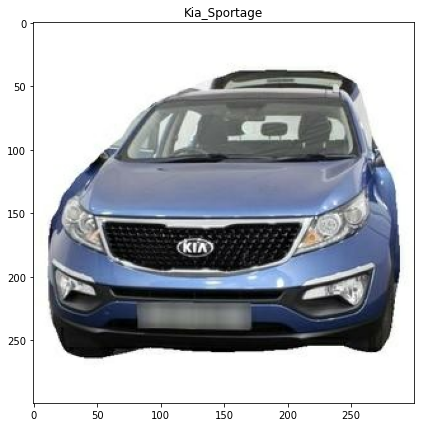

category_id: 62
image_id: 622702
path: b'Car_Images/resized_DVM_v2/resized_DVM/Toyota/Verso/2014/Blue/Toyota$$Verso$$2014$$Blue$$92_40$$317$$image_4.jpg'
Image shape: (300, 300, 3)


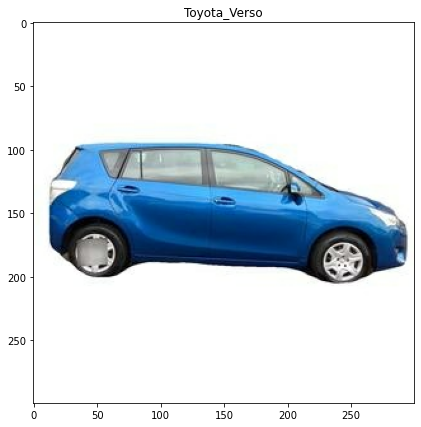

In [126]:
raw_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir}/file_00-{num_samples}.tfrec")
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(2):
    for key in features.keys():
        if key != "image":
            print(f"{key}: {features[key]}")

    print(f"Image shape: {features['image'].shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.title(label_list[int(features["category_id"])])
    plt.show()